<a href="https://colab.research.google.com/github/BrianMutisyo/Lets-Go-Sixers/blob/main/Kaggle_Classification_Ankit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello world!

# Sam's Section

# Ankit's Section

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

# Load the data
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [2]:
# Separate features and target
X = train_data.drop(columns=['output'])
y = train_data['output']

In [3]:
# Define categorical columns to be encoded
categorical_columns = ['subject', 'phase', 'state']

In [4]:
# One-hot encoding for categorical columns
onehot_encoder = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
], remainder='passthrough')

In [5]:
# Transform the train and test data
X_encoded = onehot_encoder.fit_transform(X)
test_data_encoded = onehot_encoder.transform(test_data)

In [6]:
# Split the data for validation
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [7]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# Validate the model
y_val_pred = rf_model.predict(X_val)
validation_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {validation_accuracy:.4f}")

Validation Accuracy: 0.8571


In [9]:
# Predict on the test data
test_predictions = rf_model.predict(test_data_encoded)

In [10]:
# Format the predictions for submission
submission_df = pd.DataFrame({
    'id': test_data.index,
    'output': test_predictions
})

In [11]:
# Save the predictions to a CSV file
submission_df.to_csv('submission.csv', index=False)

In [12]:
print("Predictions saved to submission.csv")

Predictions saved to submission.csv


Key Enhancements:
* Scaling: The numeric columns are scaled using StandardScaler to help the model handle numeric values more efficiently.
* Hyperparameter Tuning: GridSearchCV is used to find the best combination of Random Forest hyperparameters.
* Cross-Validation: Instead of using a single validation split, k-fold cross-validation (with cv=5) gives a more robust score.

In [1]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

# Load the data
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

# Separate features and target
X = train_data.drop(columns=['output'])
y = train_data['output']

# Define categorical and numeric columns
categorical_columns = ['subject', 'phase', 'state']
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing: One-hot encoding for categorical columns, scaling for numeric columns
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
    ('scaler', StandardScaler(), numeric_columns)
])

# Define XGBoost model with GPU support
xgb_model = xgb.XGBClassifier(tree_method='gpu_hist', use_label_encoder=False, eval_metric='logloss')

# Define a pipeline: preprocessing followed by XGBoost
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

# Randomized Search Parameters
param_distributions = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 6, 9],
    'classifier__learning_rate': [0.01, 0.1, 0.2]
}

# RandomizedSearchCV with parallelization and GPU-accelerated XGBoost
random_search = RandomizedSearchCV(
    pipeline, param_distributions, n_iter=10, scoring='accuracy', cv=5, random_state=42, n_jobs=-1
)

# Fit the model
random_search.fit(X, y)

# Best parameters and score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Cross-validation Score: {random_search.best_score_:.4f}")

# Predict on the test data
test_data_encoded = random_search.best_estimator_.named_steps['preprocessor'].transform(test_data)
test_predictions = random_search.best_estimator_.named_steps['classifier'].predict(test_data_encoded)

# Format the predictions for submission
submission_df = pd.DataFrame({
    'id': test_data.index,
    'output': test_predictions
})

# Save the predictions to a CSV file
submission_df.to_csv('submission_gpu.csv', index=False)

print("Predictions saved to submission_gpu.csv")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:04:55] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:04:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 9, 'classifier__learning_rate': 0.1}
Best Cross-validation Score: 0.8656
Predictions saved to submission_gpu.csv


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:04:58] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:04:58] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


In [2]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.4 MB/s eta 0:00:00


In [3]:
import optuna
import xgboost as xgb
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the data
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

# Separate features and target
X = train_data.drop(columns=['output'])
y = train_data['output']

# Split data for validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numeric columns
categorical_columns = ['subject', 'phase', 'state']
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing: One-hot encoding for categorical columns, scaling for numeric columns
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
    ('scaler', StandardScaler(), numeric_columns)
])

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

# Define the objective function for Optuna
def objective(trial):
    param = {
        'tree_method': 'hist',  # Faster on GPU
        'device': 'cuda',  # GPU support
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0)
    }

    # Train XGBoost model
    model = xgb.XGBClassifier(**param)
    model.fit(X_train, y_train)

    # Validate the model
    score = model.score(X_valid, y_valid)
    return score

# Create a study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Best hyperparameters
print("Best Hyperparameters:", study.best_params)

# Train on full data using best hyperparameters
best_model = xgb.XGBClassifier(**study.best_params)
best_model.fit(X_train, y_train)

# Predict on the test data
test_data_encoded = preprocessor.transform(test_data)
test_predictions = best_model.predict(test_data_encoded)

# Format the predictions for submission
submission_df = pd.DataFrame({
    'id': test_data.index,
    'output': test_predictions
})

# Save the predictions to a CSV file
submission_df.to_csv('submission_optuna.csv', index=False)

print("Predictions saved to submission_optuna.csv")

[I 2024-10-19 18:09:19,371] A new study created in memory with name: no-name-0cd94eea-f786-44ac-b931-ca998f26d2ef
<ipython-input-3-aa0f503babcb>:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-3-aa0f503babcb>:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-3-aa0f503babcb>:44: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_logunifo

Best Hyperparameters: {'n_estimators': 160, 'max_depth': 12, 'learning_rate': 0.06806890658910449, 'subsample': 0.9995021266803916, 'colsample_bytree': 0.6285817854072765, 'lambda': 0.11019480721665534, 'alpha': 0.005958951726100463}
Predictions saved to submission_optuna.csv


In [3]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 22.0 MB/s eta 0:00:00


In [4]:
pip install category-encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.3 MB/s eta 0:00:00


* Memory Management: The code optimizes the data types and uses a subset of the training data to manage memory consumption effectively.
* Preprocessing: It includes target encoding for categorical features and scales numeric features.
* Polynomial Features: Polynomial features are applied with interactions only, helping to reduce dimensionality.
* Optuna Integration: It includes a hyperparameter tuning setup using Optuna for the XGBoost model.
* Stacking Classifier: It combines predictions from XGBoost, LightGBM, and CatBoost for better performance.

In [15]:
pip install --upgrade xgboost

In [18]:
gc.collect()

1096

In [22]:
gc.collect()

111346

In [26]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

[I 2024-10-19 19:18:08,831] A new study created in memory with name: no-name-34f5de8d-b518-4abc-b92f-f7a5886c8a75


Loading data took 0.54 seconds
Splitting data took 0.01 seconds
Creating preprocessor took 0.00 seconds
Applying target encoding took 0.10 seconds


[I 2024-10-19 19:18:11,160] Trial 0 finished with value: 0.8538713195201745 and parameters: {'n_estimators': 776, 'max_depth': 3, 'learning_rate': 0.04353396078675053, 'subsample': 0.5039884802499481, 'colsample_bytree': 0.8838428159709926, 'lambda': 0.023868234768160555, 'alpha': 0.087621776680293}. Best is trial 0 with value: 0.8538713195201745.
[I 2024-10-19 19:18:17,406] Trial 1 finished with value: 0.8407851690294439 and parameters: {'n_estimators': 319, 'max_depth': 9, 'learning_rate': 0.002831956461430996, 'subsample': 0.7380920520451759, 'colsample_bytree': 0.6645893938266938, 'lambda': 0.5319219126984857, 'alpha': 5.382835728697154}. Best is trial 0 with value: 0.8538713195201745.
[I 2024-10-19 19:18:18,717] Trial 2 finished with value: 0.8386041439476554 and parameters: {'n_estimators': 498, 'max_depth': 3, 'learning_rate': 0.0015340798339090504, 'subsample': 0.626835598416845, 'colsample_bytree': 0.7391119959318266, 'lambda': 0.0003108046901624853, 'alpha': 0.693600887622196

Running Optuna study took 205.97 seconds
Best Hyperparameters: {'n_estimators': 1462, 'max_depth': 6, 'learning_rate': 0.008252647239585268, 'subsample': 0.8798353150886109, 'colsample_bytree': 0.9915078582609945, 'lambda': 0.0021412922470020242, 'alpha': 1.1851271361097405e-05}
Training final XGBoost model took 55.63 seconds


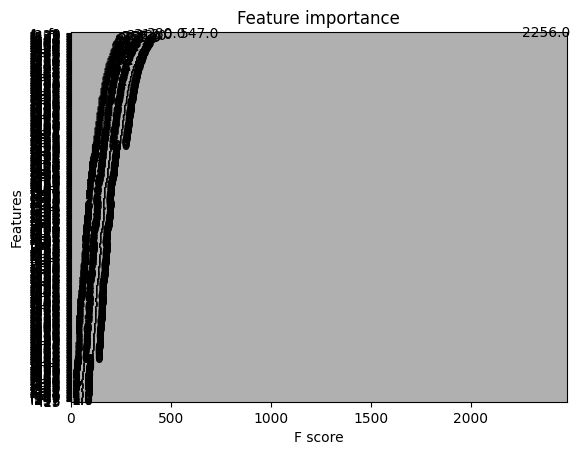

Plotting feature importance took 4.16 seconds
Preparing test data took 0.03 seconds


Training stacking model took 577.64 seconds
Making predictions took 0.05 seconds
Saving predictions took 0.00 seconds
Predictions saved to submission_stacked2.csv


119706

In [27]:
import optuna
import xgboost as xgb
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from catboost import CatBoostClassifier
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
import time
import gc

# Function to monitor time
class MonitorTime:
    def __init__(self, step):
        self.step = step

    def __enter__(self):
        self.start_time = time.time()
        return self

    def __exit__(self, exc_type, exc_val, exc_tb):
        end_time = time.time()
        print(f"{self.step} took {end_time - self.start_time:.2f} seconds")

# Load the data
with MonitorTime("Loading data"):
    train_data = pd.read_csv('train_data.csv')  # Use full data for training
    test_data = pd.read_csv('test_data.csv')

# Separate features and target
X = train_data.drop(columns=['output'])
y = train_data['output']

# Split data for validation
with MonitorTime("Splitting data"):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numeric columns
categorical_columns = ['subject', 'phase', 'state']
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing Pipeline
def create_preprocessor():
    with MonitorTime("Creating preprocessor"):
        preprocessor = ColumnTransformer([
            ('target_encode', ce.TargetEncoder(cols=categorical_columns), categorical_columns),
            ('scaler', StandardScaler(), numeric_columns)
        ])
    return preprocessor

preprocessor = create_preprocessor()

# Fit and transform the training data with target encoding
with MonitorTime("Applying target encoding"):
    X_train_transformed = preprocessor.fit_transform(X_train, y_train)
    X_valid_transformed = preprocessor.transform(X_valid)

def objective(trial):
    param = {
        'tree_method': 'gpu_hist',
        'device': 'gpu',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1500),  # Wider range
        'max_depth': trial.suggest_int('max_depth', 3, 15),  # Increased max depth
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3, log=True),  # Broader range
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'lambda': trial.suggest_float('lambda', 1e-5, 10.0, log=True),  # Broader range
        'alpha': trial.suggest_float('alpha', 1e-5, 10.0, log=True)   # Broader range
    }

    model = xgb.XGBClassifier(**param)
    model.fit(X_train_transformed, y_train)
    return model.score(X_valid_transformed, y_valid)

# Create Optuna study for hyperparameter tuning
with MonitorTime("Running Optuna study"):
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=20)  # Limit trials to manage memory

# Display best hyperparameters
print("Best Hyperparameters:", study.best_params)

# Train best XGBoost model
xgb_model = xgb.XGBClassifier(**study.best_params)
with MonitorTime("Training final XGBoost model"):
    xgb_model.fit(X_train_transformed, y_train)

# Feature Importance Plot
with MonitorTime("Plotting feature importance"):
    xgb.plot_importance(xgb_model)
    plt.show()

# Prepare test data for prediction
with MonitorTime("Preparing test data"):
    test_data_encoded = preprocessor.transform(test_data)

# CatBoost Classifier
catboost_model = CatBoostClassifier(task_type='GPU', verbose=0)  # CatBoost with GPU

# Stacking model
stacked_model = StackingClassifier(
    estimators=[('xgb', xgb_model), ('catboost', catboost_model)],
    final_estimator=xgb.XGBClassifier()  # Using XGBoost as the final estimator
)

# Train and predict using stacking
with MonitorTime("Training stacking model"):
    stacked_model.fit(X_train_transformed, y_train)

with MonitorTime("Making predictions"):
    test_predictions = stacked_model.predict(test_data_encoded)

# Save predictions for submission
with MonitorTime("Saving predictions"):
    submission_df = pd.DataFrame({
        'id': test_data.index,
        'output': test_predictions
    })
    submission_df.to_csv('submission_stacked.csv', index=False)

print("Predictions saved to submission_stacked2.csv")

# Clean up memory
gc.collect()

In [28]:
pip install imbalanced-learn

In [31]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from category_encoders import TargetEncoder

# Load the data
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

# Separate features and target
X = train_data.drop(columns=['output'])
y = train_data['output']

# Split data for validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numeric columns
categorical_columns = ['subject', 'phase', 'state']
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing Pipeline
preprocessor = ColumnTransformer([
    ('target_encode', TargetEncoder(cols=categorical_columns), categorical_columns),
    ('scaler', StandardScaler(), numeric_columns)
])

# Apply preprocessing to training data
X_train_transformed = preprocessor.fit_transform(X_train, y_train)  # Pass y_train here
X_valid_transformed = preprocessor.transform(X_valid)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_transformed, y_train)

# Train XGBoost model with balanced data and specified hyperparameters
model = xgb.XGBClassifier(
    n_estimators=1462,
    max_depth=6,
    learning_rate=0.008252647239585268,
    subsample=0.8798353150886109,
    colsample_bytree=0.9915078582609945,
    reg_lambda=0.0021412922470020242,  # Fixed from lambda to reg_lambda
    alpha=1.1851271361097405e-05,
    scale_pos_weight=1,
    use_label_encoder=False,
    eval_metric='mlogloss'  # Set an appropriate evaluation metric
)

model.fit(X_train_balanced, y_train_balanced)

# Validate the model
y_pred = model.predict(X_valid_transformed)
print("Validation Accuracy:", accuracy_score(y_valid, y_pred))
print("Classification Report:\n", classification_report(y_valid, y_pred))

# Prepare test data for prediction
test_data_transformed = preprocessor.transform(test_data)
test_predictions = model.predict(test_data_transformed)

# Save predictions for submission
submission_df = pd.DataFrame({
    'id': test_data.index,
    'output': test_predictions
})
submission_df.to_csv('submission_xgb_smote.csv', index=False)

print("Predictions saved to submission_xgb_smote.csv")

Validation Accuracy: 0.8669574700109052
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.37      0.47       148
           1       0.89      0.96      0.92       769

    accuracy                           0.87       917
   macro avg       0.77      0.67      0.70       917
weighted avg       0.85      0.87      0.85       917

Predictions saved to submission_xgb_smote.csv


In [1]:
import gc
gc.collect()

54

# Brian's Section